In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m
import decimal as d
from sklearn import preprocessing

In [2]:
from math import factorial
def bates(array, n):
    sng = 0
    result = 0
    X = np.average(array)
    f = (n/factorial(n-1))
    for k in range(n+1):
        if n*X < k:
            sng = -1
        if n*X == k:
            sng = 0
        if n*X > k:
            sng = 1
        result += ((-1)**k * nCr(n, k) * (n*X - k)**(n-1) * sng *f)
    return [X,result]
    

<h1>Minimum at Rp distance away</h1>

In [18]:
first1 = pd.read_csv("~/Desktop/TheOnesThatReachedFirst99xy.csv")
reach1= pd.read_csv("~/Desktop/TheOnesThatReachedFromTheTotal99xy.csv")
allGen1 = pd.read_csv("~/Desktop/TotalRandomGeneratedData99xy.csv")

In [21]:
max(reach1["rho"])

39.65685550195112

In [4]:
print(min(allGen1["rho_"].to_numpy()))
max(allGen1["rho_"].to_numpy()) 

39.60512405280225


45.390180794073686

Final Theta angle of those that reached first

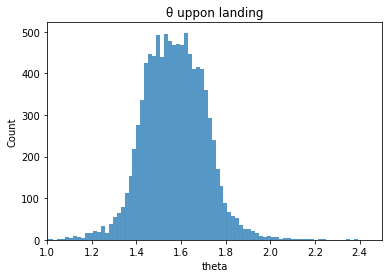

In [5]:
fig, ax = plt.subplots()
sns.histplot(data=first1, x = 'theta', ax=ax)  # distplot is deprecate and replaced by histplot
ax.set_xlim(1,2.5)
ax.set_title("\u03B8 uppon landing")
#ax.set_xticks(range(7.5*10**(-7) - 3.75*10**(-8), 7.5*10**(-7) + 3.75*10**(-8)))
plt.show()

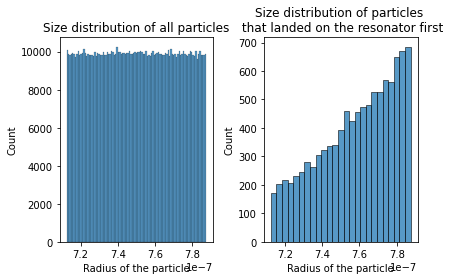

In [6]:

plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Radius of the particle")
axes[1].set_xlabel("Radius of the particle")
axes[0].set_title("Size distribution of all particles")
axes[1].set_title("Size distribution of particles \n that landed on the resonator first")
sns.histplot(data = first1, x = 'Rp_', ax=axes[1])
sns.histplot(data = allGen1, x = 'Rp_', ax=axes[0])
plt.show()

<h1>min distance at 4Xmax(Rp)</h1>

In [9]:
#first2 = pd.read_csv("TheOnesThatReachedFirst4x.csv")
reach2 = pd.read_csv("TheOnesThatReachedFromTheTotal3xy.csv")
allGen2 = pd.read_csv("TotalRandomGeneratedData3xy.csv")

In [12]:
print(min(reach2.rho))
print(min(allGen2.rho_))

-39144.43846788752
39.6569422098402


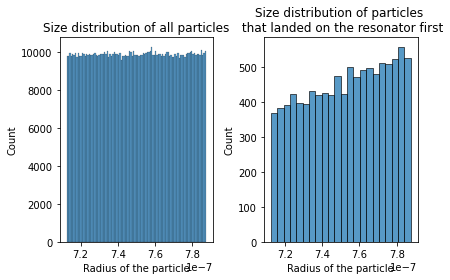

In [31]:

plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlabel("Radius of the particle")
axes[1].set_xlabel("Radius of the particle")
axes[0].set_title("Size distribution of all particles")
axes[1].set_title("Size distribution of particles \n that landed on the resonator first")
sns.histplot(data = first2, x = 'Rp_', ax=axes[1])
sns.histplot(data = allGen2, x = 'Rp_', ax=axes[0])
plt.show()

In [57]:
max(allGen2['Rp_'].to_numpy())


7.874999867170288e-07

<span>Statistics</span>

In [11]:
#allgen =np.asarray(allGen1.Rp_.to_numpy()).reshape(1,1000000)

In [12]:
def AVG(array,type):
    a = []
    low = 0
    high = 100
    for i in range(int(len(array)/100)):
        arr = array[low:high]
        if type == "avg":
            avg = np.average(arr)
            a.append(avg)
        if type == "std":
            std = np.std(arr)
            a.append(std)
        low+=100
        high+=100
    return a
        

In [13]:
def norm(N,d):
    d = np.sort(d)
    sc = (max(d)-min(d))/N
    count = 0
    f = []
    g = []
    low = min(d)
    f.append(low)
    high = low+sc
    for j in range(N):
        for i in d:
            if i>=low and i<=high:
                count+=1
        f.append(high)
        g.append(count/len(d))
        count = 0
        low+=sc
        high+=sc
    return [f,g]

In [14]:
def mean1(matrix):
    sm = 0
    hor = matrix[0]
    count = matrix[1]
    for i in range(len(hor)-1):
        sm += count[i]*((hor[i+1]+hor[i])/2)
    return sm


In [15]:
g = first1["Rp_"].to_numpy() #out of 100,000 this represents the 10,000 that reached first 
fst1 = norm(200,g) 

g1 = first2["Rp_"].to_numpy()
fst2 = norm(200,g1)

In [16]:
def stdev(array):
    count = array[1]
    hor = array[0]
    sm = 0
    mean = mean1(array)
    for i in range(len(hor)-1):
        sm += (((((hor[i]+hor[i+1])/2) - mean)**2) * count[i])
    return np.sqrt(sm)


In [58]:
gg = allGen1["Rp_"].to_numpy()
avg1 = AVG(gg,"avg")
std1 = AVG(gg,"std")
allavg1 = norm(200,avg1)
allstd1 = norm(200,std1)
actNorm = norm(200,first1.Rp_.to_numpy())
actSTD = norm(200, first1.Rp_.to_numpy())
mean11 = mean1(actNorm)
stdev1 = stdev(actSTD)

gg2 = allGen2["Rp_"].to_numpy()
avg2 = AVG(gg2,"avg")
std2 = AVG(gg2,"std")
allavg2 = norm(200,avg2)
allstd2 = norm(200,std2)
actNorm2 = norm(200,first2.Rp_.to_numpy())
actSTD2 = norm(200, first2.Rp_.to_numpy())
mean2 = mean1(actNorm2)
stdev2 = stdev()

In [60]:
print(np.std(gg2))

2.1648332446216476e-08


In [19]:
print(max(allGen1["rho_"].to_numpy()))
print(max(allGen2["rho_"].to_numpy()))

45.390180794073686
41.30676718973629


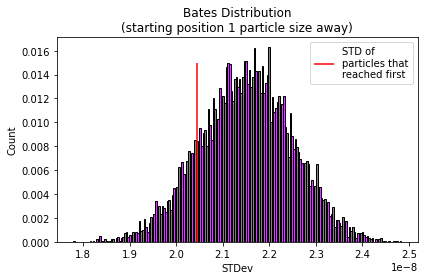

In [20]:
Average1=stdev1
fig, ax = plt.subplots()
bin_edge=allstd1[0]
counts = allstd1[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 1 particle size away)")
ax.set_xlabel("STDev")
ax.set_ylabel("Count")
#ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="STD of\nparticles that\nreached first")
ax.legend()

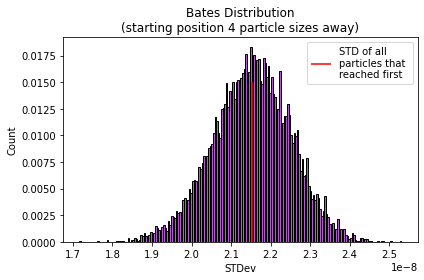

In [26]:
std2=stdev2
fig, ax = plt.subplots()
bin_edge=allstd2[0]
counts = allstd2[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 4 particle sizes away)")
ax.set_xlabel("STDev")
ax.set_ylabel("Count")
#ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([std2], 0,.015,colors="red",label="STD of all \nparticles that \nreached first")
ax.legend()

In [22]:
def nCr(n, r):
     
    return (factorial(n) / (factorial(r)
                * factorial(n - r)))


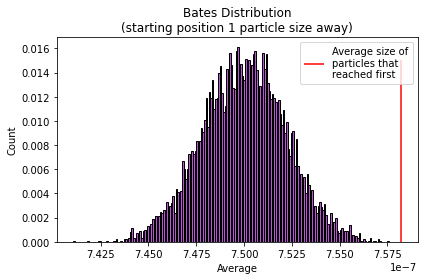

In [51]:
Average1=mean11
fig, ax = plt.subplots()
bin_edge=allavg1[0]
counts = allavg1[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 1 particle size away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
#ax.vlines([vl],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

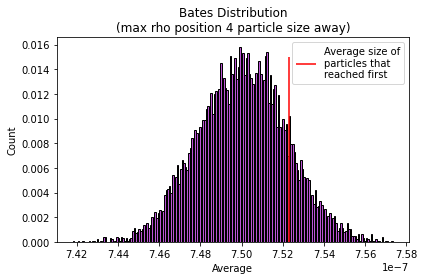

In [50]:
Average2=mean2
fig, ax = plt.subplots()
bin_edge=allavg2[0]
counts = allavg2[1]
ax.bar(x=bin_edge[:-1], height=counts, width=np.diff(bin_edge), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(max rho position 4 particle size away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
#ax.vlines([vl2],0, 0.015,colors="blue")
ax.vlines([Average1], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

In [25]:
Average2=mean1(gg1)
fig, ax = plt.subplots()
bin_edge2=a2[0]
counts2 = a2[1]
ax.bar(x=bin_edge2[:-1], height=counts, width=np.diff(bin_edge2), align='edge', fc='MediumOrchid', ec='black')
ax.set_title("Bates Distribution\n(starting position 4 particle sizes away)")
ax.set_xlabel("Average")
ax.set_ylabel("Count")
ax.vlines([vl2],0,.015,colors="blue")
ax.vlines([Average2], 0,.015,colors="red",label="Average size of\nparticles that\nreached first")
ax.legend()

NameError: name 'gg1' is not defined

In [52]:
print("One Particle Size Away")
print("area under the curve: ", sum(allavg1[1]))
s = 0
for i in range(len(allavg1[0])-1):
    if allavg1[0][i] > Average1:
        s += allavg1[1][i]
print("p-value: ", s)

One Particle Size Away
area under the curve:  0.9999999999999998
p-value:  0


In [53]:
print("Four Particle Sizes Away")
print("area under the curve: ", sum(allavg2[1]))
s2 = 0
for i in range(len(allavg2[0])-1):
    if allavg2[0][i] > Average2:
        s2 += allavg2[1][i]
print("p-value: ", s2)

Four Particle Sizes Away
area under the curve:  0.9999999999999994
p-value:  0.14379999999999987
